In [93]:
#imports 
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model

#stats-model api import
import statsmodels.api as sm


In [94]:
"""
Two methods to read data, one from an .xlsx sheet and one way from a .csv file the first column of data must be the 
dependent varible, the rest of the columns should be the independent variable(s)
"""

#reading an excel sheet containing the data
data = pd.read_excel('/Users/aditya/ctc-hackathon-2022/us-state-obesity.xlsx')

#reading a csv file containing data, get rid of first "#" and replace second "#" with directory path to csv file
#data = pd.read_csv('#')

In [95]:
#displaying the first 5 rows, allow user to see if data was correctly displayed
data.head()


,Obesity Rate (%),Physical Inacitivity Rate (%),Public Health Funding Per Capita ($),Excessive Drinking Rate (%),Uninsured Residents (%),Primary Care Physicians (per 100 000)
0,36.1,31.5,116,13.6,9.7,203.5
1,30.5,21.7,289,18.2,12.2,321.1
2,31.4,24.1,57,16.5,11.3,214.9
3,37.4,31.2,109,14.9,9.1,206.0
4,26.3,22.4,118,18.3,7.7,189.7


In [96]:
#row0 is a list of the headers, e.g ['Suicide rate','Electricity Access', etc..]
row0 = list(data)

#x is the independent variable data other than than first column, which is the dependent variable. 
x=data.drop([row0[0]],axis=1).values

#y is equal to the dependent data, column 0 
y=data[row0[0]].values

In [97]:
"""
trains the model using datasets, test_size set to a high value 
since data is limited; model trains using more input data
"""


#test_size should be adjusted relative to the sample size, lower sample
#size requires a higher test_size input (0 - 1.0) 


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.70, random_state=0)

In [98]:
#create linear regression object

ml = LinearRegression()

#train the model using the training sets
ml.fit(x_train, y_train)

LinearRegression()

In [99]:
#make predictions using the testing set

y_pred = ml.predict(x_test)


In [100]:
"""
Compares the predicted value from the machine learning model to the actual values,
ensuring that the sum of the residuals is minimal and outliers are made known. 
"""

pred_y_df=pd.DataFrame({'Actual Value':y_test, 'Predicted Value':y_pred, 'Difference':y_test-y_pred})
pred_y_df[0:-1]

,Actual Value,Predicted Value,Difference
0,31.8,29.452036,2.347964
1,29.5,28.576378,0.923622
2,25.0,31.011237,-6.011237
3,36.5,35.667856,0.832144
4,31.4,30.452876,0.947124
5,30.6,31.524663,-0.924663
6,30.0,33.276511,-3.276511
7,27.1,33.977515,-6.877515
8,30.1,27.674925,2.425075
9,26.3,29.271905,-2.971905


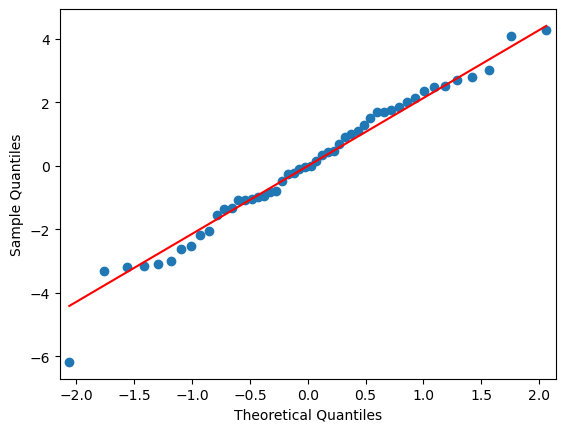

In [101]:
sm.qqplot(est2.resid, line='s');

In [102]:
"""
using the statsmodels api, we can get important summary statistics such as 
the coefficients for our equations and our p-values from the analysis
"""

X2 = sm.add_constant(x)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.559
Model:                            OLS   Adj. R-squared:                  0.509
Method:                 Least Squares   F-statistic:                     11.14
Date:                Sun, 20 Nov 2022   Prob (F-statistic):           5.65e-07
Time:                        10:15:12   Log-Likelihood:                -117.71
No. Observations:                  50   AIC:                             247.4
Df Residuals:                      44   BIC:                             258.9
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         16.7064      4.997      3.343      0.0

In [103]:
"""
logic developed to determine p values that are < 0.05, which indicate a statiscally significant 
relationship between our dependent variable and any of our independent variables
"""

significant_p = []
for i in range(1, len(row0)):
    if est2.pvalues[i] < 0.05:
         significant_p.append(row0[i])
            
significant_p

#if len(significant_p)==0:
#    print('No significant relationships found.')
            


['Physical Inacitivity Rate (%)']